In [475]:
import os
import numpy as np
import pandas as pd

### Combining the review files

In [4]:
master_df = pd.DataFrame()

for file in os.listdir(os.getcwd()):
    if file.endswith('.csv'):
        master_df = master_df.append(pd.read_csv(file))
        
master_df.to_csv('Master File.csv', index=False)

In [5]:
master_df.head()

,skillDevelopment,reviewText,location,cons,salaryBenefits,workLifeBalance,pros,workSatisfaction,postedon,jobSecurity,careerGrowth,companyCulture,company,jobFunction,overallScore
0,1.0,Its good and managable only because of team.,Lucknow,Fake offers were given while recruiting. Wrong...,1.0,3.0,Only my collegues and work culture. There is n...,3.0,21-Apr-22,4.0,1.0,4.0,HCL Technologies,Hr Executive,1.0
1,4.0,Very balanced and rarely pressuring.,Noida,* Although it's WFH as of now but no general t...,2.0,5.0,Overall good experience for me! Very much secu...,4.0,16-Apr-22,5.0,4.0,3.0,HCL Technologies,Technical Lead,4.0
2,3.0,working hours are 9:30 hours no shift allowanc...,Greater Noida,Management always listen what the manager sayi...,2.0,3.0,Job security is there Client or Customer centr...,1.0,20-Apr-22,4.0,2.0,2.0,HCL Technologies,Senior Specialist,3.0
3,1.0,Too bad for a mid level experienced. Enquire p...,Chennai,Work culture is too bad and experienced so man...,1.0,2.0,It is a growing organization and has multiple ...,1.0,09-Dec-21,4.0,1.0,1.0,HCL Technologies,Senior Technical Lead,1.0
4,1.0,Is there anything called work life balance her...,Chennai,Why not paying your employees good!? .Stop ove...,4.0,1.0,"Hcl is avery good organization,But the middle ...",1.0,04-Mar-22,4.0,1.0,1.0,HCL Technologies,Software Engineer,1.0


### Exploratory Data Analysis

In [613]:
# Reading the master file
df = pd.read_csv("C:/Users/Anindita/Documents/ISB/Capstone Project/Projects/Capstone Peak Health/Data/Master/Master File.csv")

In [614]:
df.shape

(97097, 15)

In [615]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97097 entries, 0 to 97096
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   skillDevelopment  97006 non-null  float64
 1   reviewText        43222 non-null  object 
 2   location          66513 non-null  object 
 3   cons              85931 non-null  object 
 4   salaryBenefits    96451 non-null  float64
 5   workLifeBalance   97008 non-null  float64
 6   pros              90430 non-null  object 
 7   workSatisfaction  96454 non-null  float64
 8   postedon          97096 non-null  object 
 9   jobSecurity       96464 non-null  float64
 10  careerGrowth      96446 non-null  float64
 11  companyCulture    96473 non-null  float64
 12  company           97096 non-null  object 
 13  jobFunction       96897 non-null  object 
 14  overallScore      97097 non-null  float64
dtypes: float64(8), object(7)
memory usage: 11.1+ MB


In [616]:
# Checking null values
df.isnull().sum()

skillDevelopment       91
reviewText          53875
location            30584
cons                11166
salaryBenefits        646
workLifeBalance        89
pros                 6667
workSatisfaction      643
postedon                1
jobSecurity           633
careerGrowth          651
companyCulture        624
company                 1
jobFunction           200
overallScore            0
dtype: int64

#### We notice 55% of data missing under the column - ReviewText. However, the 'Pros' and 'Cons' columns have only ~ 7% and 11% data missing

In [617]:
# Extracting the desired variables for analysis
reviews = df[['company','overallScore','reviewText','cons','pros']]

In [618]:
reviews.shape

(97097, 5)

In [619]:
reviews.head()

,company,overallScore,reviewText,cons,pros
0,HCL Technologies,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong information about oppotunities were given. No tra...,Only my collegues and work culture. There is no option to rate below 1 for compensation & benefi...
1,HCL Technologies,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general transportation available. * Compensation & Hikes ar...,Overall good experience for me! Very much secured in terms of job security. Work life balance is...
2,HCL Technologies,3.0,working hours are 9:30 hours no shift allowances shift gets changed on weekly basis sometimes in...,Management always listen what the manager saying there is no one listen for end user who is givi...,Job security is there Client or Customer centric company and to make client or customer happy th...
3,HCL Technologies,1.0,Too bad for a mid level experienced. Enquire properly before joining the roles & responsibilitie...,Work culture is too bad and experienced so many mind games and politics from the team mates. Ear...,It is a growing organization and has multiple mechanical engineering projects currently. Many of...
4,HCL Technologies,1.0,Is there anything called work life balance here!??..this colum is a joke,Why not paying your employees good!? .Stop overloading them they have families too.Don't eat the...,"Hcl is avery good organization,But the middle management is shit. You wil get career growth if y..."


In [620]:
reviews.groupby('company').size()

company
HCL Technologies    17891
Infosys             21639
TCS                 36475
Wipro               21091
dtype: int64

Text(0.5, 1.0, 'No. of Reviews per Company')

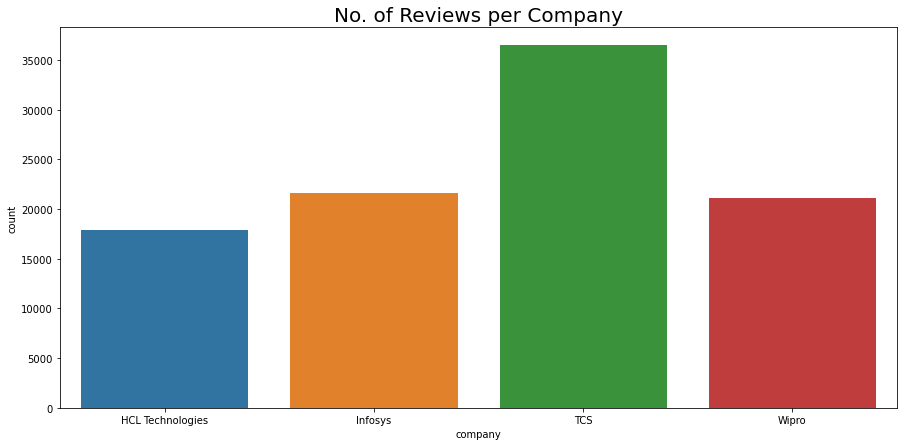

In [621]:
# of reviews per company

plt.rcParams['figure.figsize'] = (15, 7)
sns.countplot(reviews['company'])
plt.title('No. of Reviews per Company', fontsize = 20)

In [622]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97097 entries, 0 to 97096
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       97096 non-null  object 
 1   overallScore  97097 non-null  float64
 2   reviewText    43222 non-null  object 
 3   cons          85931 non-null  object 
 4   pros          90430 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.7+ MB


In [623]:
# Importing libraries
from wordcloud import WordCloud

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

import re
import string

import matplotlib.pyplot as plt 
import seaborn as sns


pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)

In [624]:
# Converting the textual data into string
reviews[['reviewText', 'cons', 'pros']] = reviews.loc[:, ['reviewText', 'cons', 'pros']]. astype(str) 
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97097 entries, 0 to 97096
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       97096 non-null  object 
 1   overallScore  97097 non-null  float64
 2   reviewText    97097 non-null  object 
 3   cons          97097 non-null  object 
 4   pros          97097 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.7+ MB


In [625]:
# Checking the row with 'nan' values
nan_in_col  = reviews[reviews['company'].isna()]
nan_in_col

,company,overallScore,reviewText,cons,pros
39530,NaN,3.920606,nan,nan,nan


In [626]:
# Dropping the row with 'nan' values
reviews.dropna(axis = 0, how = 'any', inplace = True)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97096 entries, 0 to 97096
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   company       97096 non-null  object 
 1   overallScore  97096 non-null  float64
 2   reviewText    97096 non-null  object 
 3   cons          97096 non-null  object 
 4   pros          97096 non-null  object 
dtypes: float64(1), object(4)
memory usage: 4.4+ MB


In [627]:
# Tokenization
reviews['tokenized_reviews'] = reviews['reviewText'].apply(word_tokenize)
reviews['tokenized_cons'] = reviews['cons'].apply(word_tokenize)
reviews['tokenized_pros'] = reviews['pros'].apply(word_tokenize)

In [628]:
# Converting to Lowercase
reviews['lower_reviews'] = reviews['tokenized_reviews'].apply(lambda x: [word.lower() for word in x])
reviews['lower_cons'] = reviews['tokenized_cons'].apply(lambda x: [word.lower() for word in x])
reviews['lower_pros'] = reviews['tokenized_pros'].apply(lambda x: [word.lower() for word in x])

In [629]:
# Removing Punctuations
punc = string.punctuation

reviews['nopunct_reviews'] = reviews['lower_reviews'].apply(lambda x: [word for word in x if word not in punc])
reviews['nopunct_cons'] = reviews['lower_cons'].apply(lambda x: [word for word in x if word not in punc])
reviews['nopunct_pros'] = reviews['lower_pros'].apply(lambda x: [word for word in x if word not in punc])

In [630]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anindita\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [631]:
# Removal of Stopwords
stop_words = nltk.corpus.stopwords.words('english')
new_stopwords = ["tcs","infosys","hcl","wipro", "nan"]
stop_words.extend(new_stopwords)

In [632]:
reviews['reviewText_clean'] = reviews['nopunct_reviews'].apply(lambda x: [word for word in x if word not in stop_words])
reviews['cons_clean'] = reviews['nopunct_cons'].apply(lambda x: [word for word in x if word not in stop_words])
reviews['pros_clean'] = reviews['nopunct_pros'].apply(lambda x: [word for word in x if word not in stop_words])

reviews['reviewText_str'] = [' '.join(map(str,l)) for l in reviews['reviewText_clean']]
reviews['cons_str'] = [' '.join(map(str,l)) for l in reviews['cons_clean']]
reviews['pros_str'] = [' '.join(map(str,l)) for l in reviews['pros_clean']]

reviews.head()

,company,overallScore,reviewText,cons,pros,tokenized_reviews,tokenized_cons,tokenized_pros,lower_reviews,lower_cons,lower_pros,nopunct_reviews,nopunct_cons,nopunct_pros,reviewText_clean,cons_clean,pros_clean,reviewText_str,cons_str,pros_str
0,HCL Technologies,1.0,Its good and managable only because of team.,Fake offers were given while recruiting. Wrong information about oppotunities were given. No tra...,Only my collegues and work culture. There is no option to rate below 1 for compensation & benefi...,"[Its, good, and, managable, only, because, of, team, .]","[Fake, offers, were, given, while, recruiting, ., Wrong, information, about, oppotunities, were,...","[Only, my, collegues, and, work, culture, ., There, is, no, option, to, rate, below, 1, for, com...","[its, good, and, managable, only, because, of, team, .]","[fake, offers, were, given, while, recruiting, ., wrong, information, about, oppotunities, were,...","[only, my, collegues, and, work, culture, ., there, is, no, option, to, rate, below, 1, for, com...","[its, good, and, managable, only, because, of, team]","[fake, offers, were, given, while, recruiting, wrong, information, about, oppotunities, were, gi...","[only, my, collegues, and, work, culture, there, is, no, option, to, rate, below, 1, for, compen...","[good, managable, team]","[fake, offers, given, recruiting, wrong, information, oppotunities, given, transparency, equalit...","[collegues, work, culture, option, rate, 1, compensation, benefits, job, oppotunities, otherwise...",good managable team,fake offers given recruiting wrong information oppotunities given transparency equality favourit...,collegues work culture option rate 1 compensation benefits job oppotunities otherwise could give...
1,HCL Technologies,4.0,Very balanced and rarely pressuring.,* Although it's WFH as of now but no general transportation available. * Compensation & Hikes ar...,Overall good experience for me! Very much secured in terms of job security. Work life balance is...,"[Very, balanced, and, rarely, pressuring, .]","[*, Although, it, 's, WFH, as, of, now, but, no, general, transportation, available, ., *, Compe...","[Overall, good, experience, for, me, !, Very, much, secured, in, terms, of, job, security, ., Wo...","[very, balanced, and, rarely, pressuring, .]","[*, although, it, 's, wfh, as, of, now, but, no, general, transportation, available, ., *, compe...","[overall, good, experience, for, me, !, very, much, secured, in, terms, of, job, security, ., wo...","[very, balanced, and, rarely, pressuring]","[although, it, 's, wfh, as, of, now, but, no, general, transportation, available, compensation, ...","[overall, good, experience, for, me, very, much, secured, in, terms, of, job, security, work, li...","[balanced, rarely, pressuring]","[although, 's, wfh, general, transportation, available, compensation, hikes, per, market, standa...","[overall, good, experience, much, secured, terms, job, security, work, life, balance, per, expec...",balanced rarely pressuring,although 's wfh general transportation available compensation hikes per market standards promoti...,overall good experience much secured terms job security work life balance per expectation wfh te...
2,HCL Technologies,3.0,working hours are 9:30 hours no shift allowances shift gets changed on weekly basis sometimes in...,Management always listen what the manager saying there is no one listen for end user who is givi...,Job security is there Client or Customer centric company and to make client or customer happy th...,"[working, hours, are, 9:30, hours, no, shift, allowances, shift, gets, changed, on, weekly, basi...","[Management, always, listen, what, the, manager, saying, there, is, no, one, listen, for, end, u...","[Job, security, is, there, Client, or, Customer, centric, company, and, to, make, client, or, cu...","[working, hours, are, 9:30, hours, no, shift, allowances, shift, gets, changed, on, weekly, basi...","[management, always, listen, what, the, manager, say

### Generating Word Cloud

In [633]:
def plot_wordcloud(docx):
    mywordcloud = WordCloud(width=1600, height=800, background_color='white',max_words=100).generate(docx)
    fig = plt.figure(figsize=(30,10), facecolor='white')
    plt.imshow(mywordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title('Top 100 Words', fontsize=100)
    plt.show()

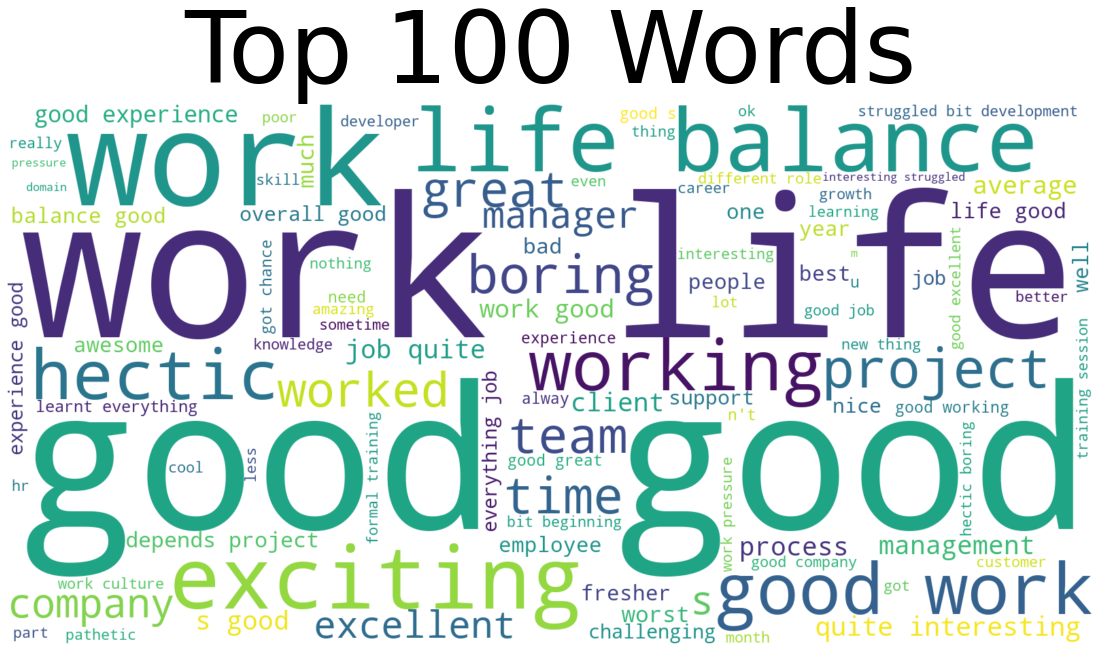

In [634]:
all_docx = ' '.join(reviews['reviewText_str'])
plot_wordcloud(all_docx)

(-0.5, 1199.5, 1199.5, -0.5)

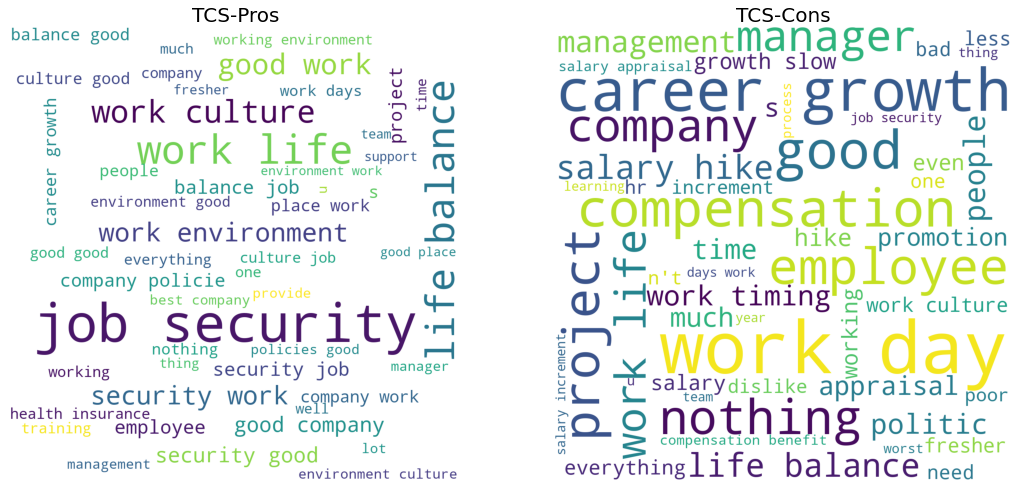

In [635]:
# TCS' summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'TCS']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('TCS-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'TCS']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('TCS-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')


(-0.5, 1199.5, 1199.5, -0.5)

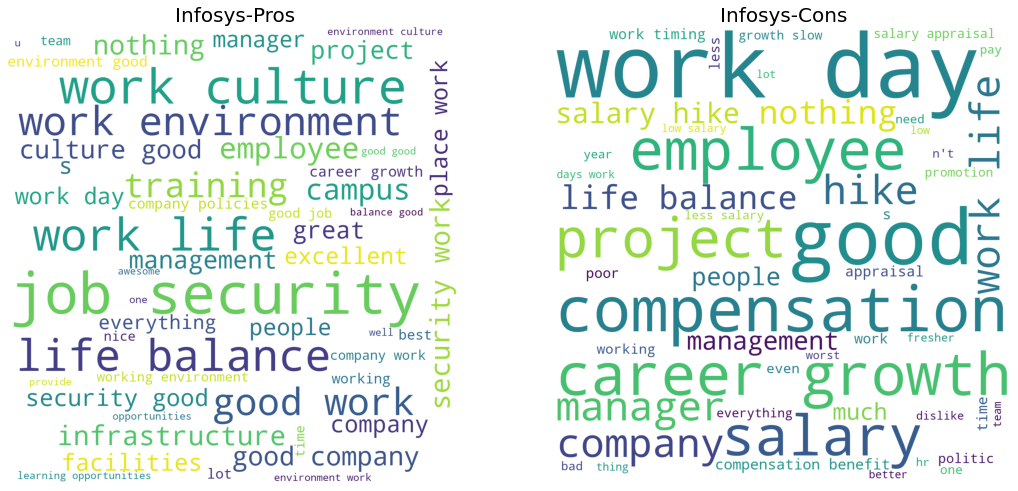

In [636]:
# Infosys' summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'Infosys']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Infosys-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'Infosys']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Infosys-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

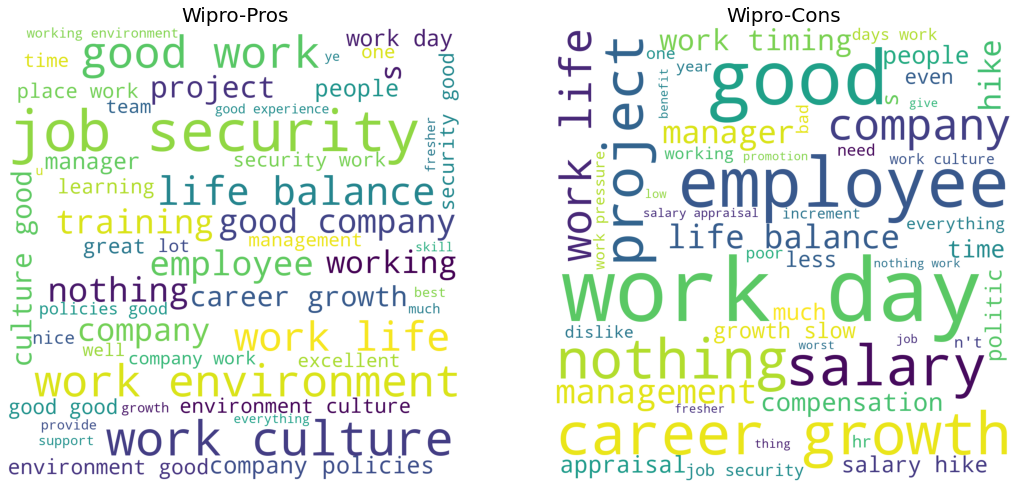

In [637]:
# Wipro summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'Wipro']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('Wipro-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'Wipro']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('Wipro-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

(-0.5, 1199.5, 1199.5, -0.5)

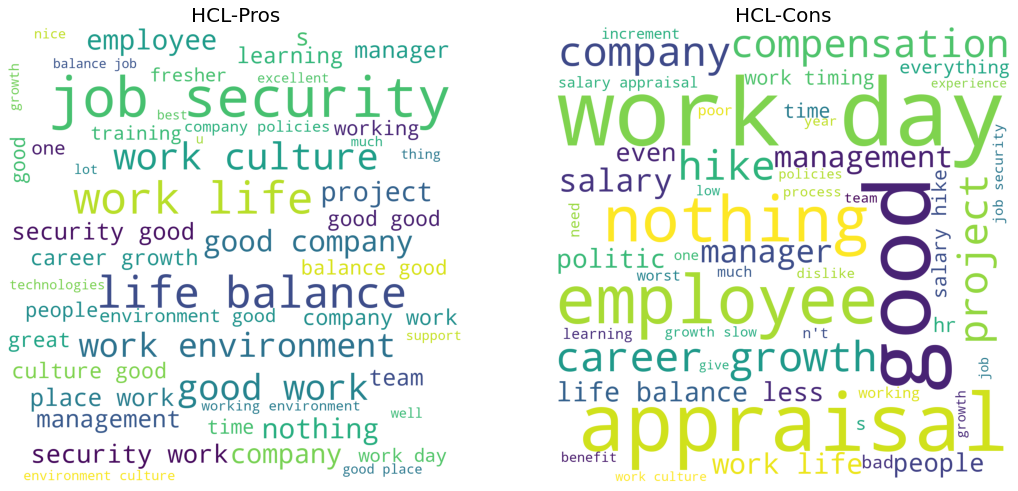

In [638]:
# HCL Technologies' summary

plt.rcParams['figure.figsize'] = (18, 10)

pros = ' '.join([text for text in reviews['pros_str'][reviews['company'] == 'HCL Technologies']])

wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(pros)
plt.subplot(1, 2, 1)
plt.title('HCL-Pros', fontsize = 20)
plt.imshow(wordcloud)
plt.axis('off')

cons = ' '.join([text for text in reviews['cons_str'][reviews['company'] == 'HCL Technologies']])

wordcloud2 = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words=50).generate(cons)
plt.subplot(1, 2, 2)
plt.title('HCL-Cons', fontsize = 20)
plt.imshow(wordcloud2)
plt.axis('off')

In [639]:
reviews.to_csv('reviews_clean.csv')

In [640]:
# Extracting the desired variables for analysis
clean = reviews.loc[:, ['company','overallScore','reviewText_clean']]

In [641]:
# Lemmatization
clean['pos_tags'] = clean['reviewText_clean'].apply(nltk.tag.pos_tag)
clean.head()

,company,overallScore,reviewText_clean,pos_tags
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]"
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, VBG)]"
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowances, shift, gets, changed, weekly, basis, sometimes,...","[(working, VBG), (hours, NNS), (9:30, CD), (hours, NNS), (shift, JJ), (allowances, NNS), (shift,..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, properly, joining, roles, responsibilities, close, circl...","[(bad, JJ), (mid, NNS), (level, NN), (experienced, VBD), (enquire, RB), (properly, JJ), (joining..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., colum, joke]","[(anything, NN), (called, VBN), (work, NN), (life, NN), (balance, NN), (.., NNP), (colum, NN), (..."


In [642]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
clean['wordnet_pos'] = clean['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]"
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, VBG)]","[(balanced, v), (rarely, r), (pressuring, v)]"
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowances, shift, gets, changed, weekly, basis, sometimes,...","[(working, VBG), (hours, NNS), (9:30, CD), (hours, NNS), (shift, JJ), (allowances, NNS), (shift,...","[(working, v), (hours, n), (9:30, n), (hours, n), (shift, a), (allowances, n), (shift, a), (gets..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, properly, joining, roles, responsibilities, close, circl...","[(bad, JJ), (mid, NNS), (level, NN), (experienced, VBD), (enquire, RB), (properly, JJ), (joining...","[(bad, a), (mid, n), (level, n), (experienced, v), (enquire, r), (properly, a), (joining, v), (r..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., colum, joke]","[(anything, NN), (called, VBN), (work, NN), (life, NN), (balance, NN), (.., NNP), (colum, NN), (...","[(anything, n), (called, v), (work, n), (life, n), (balance, n), (.., n), (colum, n), (joke, n)]"


In [643]:
wnl = WordNetLemmatizer()
clean['lemmatized'] = clean['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]"
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, VBG)]","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]"
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowances, shift, gets, changed, weekly, basis, sometimes,...","[(working, VBG), (hours, NNS), (9:30, CD), (hours, NNS), (shift, JJ), (allowances, NNS), (shift,...","[(working, v), (hours, n), (9:30, n), (hours, n), (shift, a), (allowances, n), (shift, a), (gets...","[work, hour, 9:30, hour, shift, allowance, shift, get, changed, weekly, basis, sometimes, week, ..."
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, properly, joining, roles, responsibilities, close, circl...","[(bad, JJ), (mid, NNS), (level, NN), (experienced, VBD), (enquire, RB), (properly, JJ), (joining...","[(bad, a), (mid, n), (level, n), (experienced, v), (enquire, r), (properly, a), (joining, v), (r...","[bad, mid, level, experience, enquire, properly, join, role, responsibility, close, circle, hr, ..."
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., colum, joke]","[(anything, NN), (called, VBN), (work, NN), (life, NN), (balance, NN), (.., NNP), (colum, NN), (...","[(anything, n), (called, v), (work, n), (life, n), (balance, n), (.., n), (colum, n), (joke, n)]","[anything, call, work, life, balance, .., colum, joke]"


In [644]:
# Importing Libraries
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [645]:
clean['lemma_str'] = [' '.join(map(str,l)) for l in clean['lemmatized']]
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized,lemma_str
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]",good managable team
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, VBG)]","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]",balance rarely pressure
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowances, shift, gets, changed, weekly, basis, sometimes,...","[(working, VBG), (hours, NNS), (9:30, CD), (hours, NNS), (shift, JJ), (allowances, NNS), (shift,...","[(working, v), (hours, n), (9:30, n), (hours, n), (shift, a), (allowances, n), (shift, a), (gets...","[work, hour, 9:30, hour, shift, allowance, shift, get, changed, weekly, basis, sometimes, week, ...",work hour 9:30 hour shift allowance shift get changed weekly basis sometimes week 2 day morning ...
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, properly, joining, roles, responsibilities, close, circl...","[(bad, JJ), (mid, NNS), (level, NN), (experienced, VBD), (enquire, RB), (properly, JJ), (joining...","[(bad, a), (mid, n), (level, n), (experienced, v), (enquire, r), (properly, a), (joining, v), (r...","[bad, mid, level, experience, enquire, properly, join, role, responsibility, close, circle, hr, ...",bad mid level experience enquire properly join role responsibility close circle hr interviewer w...
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., colum, joke]","[(anything, NN), (called, VBN), (work, NN), (life, NN), (balance, NN), (.., NNP), (colum, NN), (...","[(anything, n), (called, v), (work, n), (life, n), (balance, n), (.., n), (colum, n), (joke, n)]","[anything, call, work, life, balance, .., colum, joke]",anything call work life balance .. colum joke


### Sentiment Analysis using TextBlob

In [646]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'polarity_blob':sentiment_polarity,
              'subjectivity_blob':sentiment_subjectivity,
              'sentiment_blob':sentiment_label}
    return result

In [647]:
clean['sentiment_results'] = clean['lemma_str'].apply(get_sentiment)

In [648]:
clean = clean.join(pd.json_normalize(clean['sentiment_results']))
clean.head()

,company,overallScore,reviewText_clean,pos_tags,wordnet_pos,lemmatized,lemma_str,sentiment_results,polarity_blob,subjectivity_blob,sentiment_blob
0,HCL Technologies,1.0,"[good, managable, team]","[(good, JJ), (managable, JJ), (team, NN)]","[(good, a), (managable, a), (team, n)]","[good, managable, team]",good managable team,"{'polarity_blob': 0.7, 'subjectivity_blob': 0.6000000000000001, 'sentiment_blob': 'Positive'}",0.7000,0.600000,Positive
1,HCL Technologies,4.0,"[balanced, rarely, pressuring]","[(balanced, VBN), (rarely, RB), (pressuring, VBG)]","[(balanced, v), (rarely, r), (pressuring, v)]","[balance, rarely, pressure]",balance rarely pressure,"{'polarity_blob': 0.3, 'subjectivity_blob': 0.9, 'sentiment_blob': 'Positive'}",0.3000,0.900000,Positive
2,HCL Technologies,3.0,"[working, hours, 9:30, hours, shift, allowances, shift, gets, changed, weekly, basis, sometimes,...","[(working, VBG), (hours, NNS), (9:30, CD), (hours, NNS), (shift, JJ), (allowances, NNS), (shift,...","[(working, v), (hours, n), (9:30, n), (hours, n), (shift, a), (allowances, n), (shift, a), (gets...","[work, hour, 9:30, hour, shift, allowance, shift, get, changed, weekly, basis, sometimes, week, ...",work hour 9:30 hour shift allowance shift get changed weekly basis sometimes week 2 day morning ...,"{'polarity_blob': -0.24999999999999997, 'subjectivity_blob': 0.2611111111111111, 'sentiment_blob...",-0.2500,0.261111,Negative
3,HCL Technologies,1.0,"[bad, mid, level, experienced, enquire, properly, joining, roles, responsibilities, close, circl...","[(bad, JJ), (mid, NNS), (level, NN), (experienced, VBD), (enquire, RB), (properly, JJ), (joining...","[(bad, a), (mid, n), (level, n), (experienced, v), (enquire, r), (properly, a), (joining, v), (r...","[bad, mid, level, experience, enquire, properly, join, role, responsibility, close, circle, hr, ...",bad mid level experience enquire properly join role responsibility close circle hr interviewer w...,"{'polarity_blob': -0.11249999999999996, 'subjectivity_blob': 0.25416666666666665, 'sentiment_blo...",-0.1125,0.254167,Negative
4,HCL Technologies,1.0,"[anything, called, work, life, balance, .., colum, joke]","[(anything, NN), (called, VBN), (work, NN), (life, NN), (balance, NN), (.., NNP), (colum, NN), (...","[(anything, n), (called, v), (work, n), (life, n), (balance, n), (.., n), (colum, n), (joke, n)]","[anything, call, work, life, balance, .., colum, joke]",anything call work life balance .. colum joke,"{'polarity_blob': 0.0, 'subjectivity_blob': 0.0, 'sentiment_blob': 'Neutral'}",0.0000,0.000000,Neutral


<AxesSubplot:xlabel='sentiment_blob', ylabel='count'>

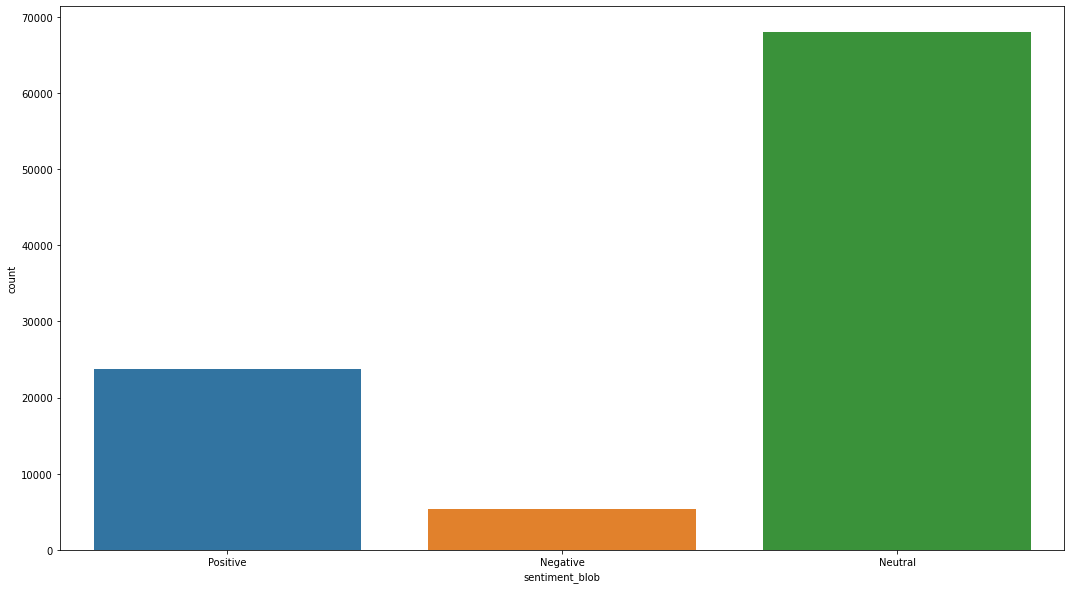

In [649]:
sns.countplot(clean['sentiment_blob'])

<AxesSubplot:xlabel='count', ylabel='company'>

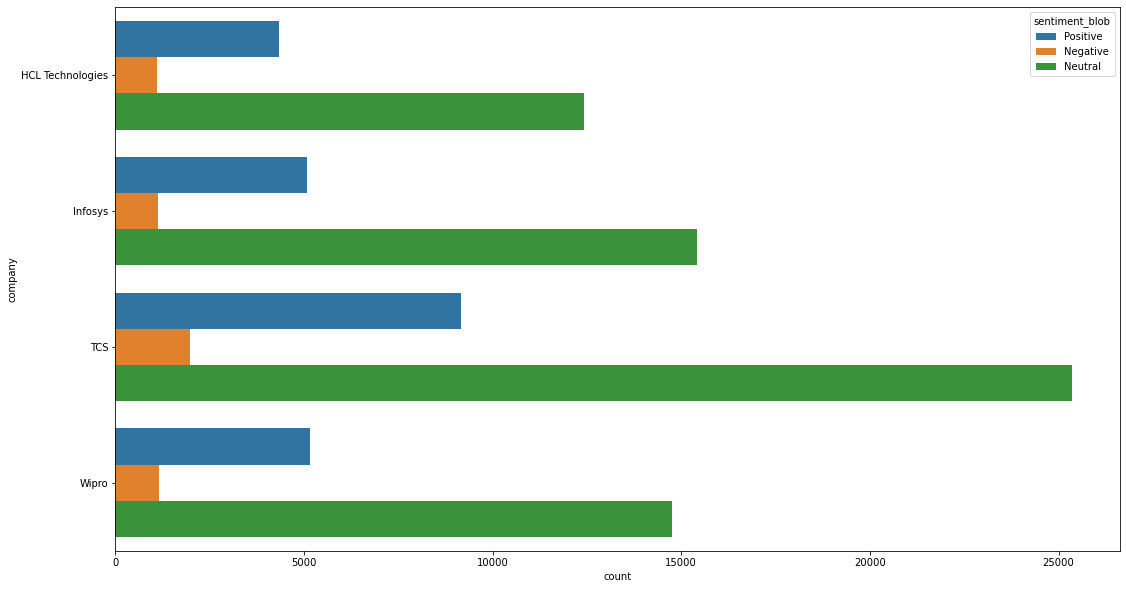

In [652]:
sns.countplot(y ='company', hue = 'sentiment_blob', data = clean)

#### *Have to explore more on sentiment analysis and the pieces after this

### Term Frequency Analysis

In [547]:
words = clean['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
print(allwords)

['good', 'managable', 'team', 'balance', 'rarely', 'pressure', 'work', 'hour', '9:30', 'hour', 'shift', 'allowance', 'shift', 'get', 'changed', 'weekly', 'basis', 'sometimes', 'week', '2', 'day', 'morning', '3', 'day', 'night', 'appraisal', 'policy', 'bad', 'last', '4', 'year', 'appraisal', '2', 'percent', 'always', 'give', 'excuse', 'givin', 'bad', 'mid', 'level', 'experience', 'enquire', 'properly', 'join', 'role', 'responsibility', 'close', 'circle', 'hr', 'interviewer', 'wo', "n't", 'reveal', 'exact', 'work', 'nature', 'tell', 'npd', 'work', 'anything', 'call', 'work', 'life', 'balance', '..', 'colum', 'joke', 'bad', 'nightmare', 'terrible', 'horrific', 'allways', 'get', 'frustrate', '😤', 'job', 'offer', 'mixed', 'bag', 'massively', 'compensate', 'although', 'recognize', 'whatever', 'achieve', 'far', 'terrible', 'zero', 'work', 'life', 'balence', 'work', 'keep', 'engaged', 'time', 'shift', 'attend', 'many', 'meeting', 'sometimes', 'result', 'shift', 'time', 'exceed', 'quick', 'lear

### Topic Modelling 

In [550]:
tf_vectorizer = CountVectorizer(max_df=0.9, min_df=25, max_features=5000)
tf = tf_vectorizer.fit_transform(clean['lemma_str'].values.astype('U'))
tf_feature_names = tf_vectorizer.get_feature_names()
doc_term_matrix = pd.DataFrame(tf.toarray(), columns=list(tf_feature_names))
doc_term_matrix

,10,100,11,12,14,15,24,able,access,accord,...,workload,world,worst,would,year,yes,yet,yield,yr,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97091,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
97092,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97093,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97094,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Latent Dirichlet Allocation (LDA) Topic Modeling